# Linear Regression Notebook
-------------------------------------------
#### Dataset is LR-data.csv
This dataset contains values for X and Y that has a +ve strong correlation, which makes it good practice for Linear Regression.

## Part One: From scratch
In the first part of the notebook, we will implement Linear Regression **from scratch** using **Gradient Descent** algorithm which we took in session ML1.

In [ ]:
# importing needed libraries for code from scratch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# reading the dataset
data = pd.read_csv('Data/LR-data.csv', header=None)
data

,0,1
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
...,...,...
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958


In [ ]:
# notice we used iloc function because there is no name for the columns in the data
# so basically, I am telling it to choose elements at location of the indices given to iloc
# X data are ALL ROWS in Col 0
X = data.iloc[:,0]
# Y data are ALL ROWS in Col 1
Y = data.iloc[:,1]

print('X sample data:\n', X[0:10],'\n\n')
print('Y sample data:\n', Y[0:10])

X sample data:
 0    32.502345
1    53.426804
2    61.530358
3    47.475640
4    59.813208
5    55.142188
6    52.211797
7    39.299567
8    48.105042
9    52.550014
Name: 0, dtype: float64 


Y sample data:
 0    31.707006
1    68.777596
2    62.562382
3    71.546632
4    87.230925
5    78.211518
6    79.641973
7    59.171489
8    75.331242
9    71.300880
Name: 1, dtype: float64


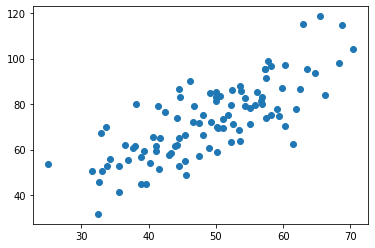

In [ ]:
# show X, Y data on X-Y coordinates
plt.scatter(X,Y)
plt.show()

R value is called Pearson's correlation Coefficient.
It represents the correlation between multiple variables.
You can search its statistical function on Google using the full name.

Numpy.corrcoef function returns a matrix of size NxN, where N is the number of the variables given to the function.

In [ ]:
# calculate the pearson's correlation coefficient between X and Y
rvals = np.corrcoef(X, Y)
rvals

array([[1.       , 0.7737285],
       [0.7737285, 1.       ]])

In [ ]:
print('Correlation between X and X =', rvals[0,0]) # Obviously 1

# it only makes sense that correlation between X and Y is as between Y and X
print('Correlation between X and Y =%.2f' % rvals[0,1])
print('Correlation between Y and X =%.2f' % rvals[1,0])

print('Correlation between Y and Y =', rvals[1,1]) # Obviously 1
# So, diagonal values in the matrix are always equal to 1

Correlation between X and X = 1.0
Correlation between X and Y =0.77
Correlation between Y and X =0.77
Correlation between Y and Y = 1.0


### Gradient Descent Algorithm:

*   Initialize m, c with zeros
*   Set values for learning rate, and number of epochs to train on
*   For each iteration in number of epochs:
  *   Calculate Ypred = mX + C (equation of linear regression)
  *   Calculate Gradients for your variables m, c
  *   update m and c values using the gradients

In [ ]:
# initialize m and c with zeros
m, c = 0, 0
# set learning rate to 0.0001, and epochs to 1000
lr = 0.0001
epochs = 1000
n = float(len(X))

In [ ]:
for i in range(epochs):
  Ypred = m*X + c
  Dm = (-2/n) * np.sum(X * (Y - Ypred))
  Dc = (-2/n) * np.sum(Y - Ypred)
  m = m - lr * Dm
  c = c - lr * Dc

In [ ]:
print('Final m =', m)
print('Final c =', c)

Final m = 1.4777440851894448
Final c = 0.08893651993741351


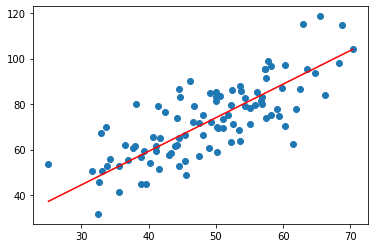

In [ ]:
# plot linear regression line and data points
plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Ypred), max(Ypred)], color='red')
# plt.plot(X, Ypred, color='red)
plt.show()

## Part Two: Using Sklearn

[Sklearn](https://scikit-learn.org/) is a library that has a lot of machine learning models ready-made.
It eases using of ML models after you got hand of them manually.
Look it up and check the models in it on its website documentation.

In this part, we will only use [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) model from Sklearn.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# X is a pandas.Series object, which is returned from iloc function
# But LinearRegression model in Sklearn needs it to be a numpy array
X = X.to_numpy()
print(X.shape)
# And it needs it to be in shape (N, 1), so we will use reshape function
X = X.reshape(-1, 1)
print(X.shape)

(100,)
(100, 1)


In [ ]:
# create model object
lin_reg_model = LinearRegression()
# fit the model on data .. which means, calculate teh coefficients of the linear model i.e. m and c
lin_reg_model.fit(X, Y)
print('m = ', lin_reg_model.coef_[0])
print('c = ', lin_reg_model.intercept_)

m =  1.3224310227553597
c =  7.991020982270399


Notice that the values of m and c are different from the ones we calculated.
That is because LinearRegression function in Sklearn uses a different cost function from the one we used above.

We used *Mean Square Error*.
Sklearn uses *Residual Sum of Square*. Look up the equation.

Both are valid.

In [ ]:
# Give the model the X values to calculated Ypredicted which is calculated from the straight line
Ypred = lin_reg_model.predict(X)

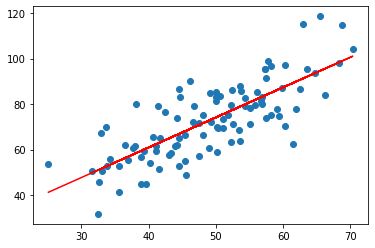

In [ ]:
# graphing your result
plt.scatter(X, Y)
plt.plot(X, Ypred, color='red')
plt.show()